In [135]:
import numpy as np
import pandas as pd

In [188]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [189]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4893,ham,Convey my regards to him,NaN,NaN,NaN
1146,ham,Babe ? I lost you ... :-(,NaN,NaN,NaN
4695,ham,A guy who gets used but is too dumb to realize...,NaN,NaN,NaN
3052,ham,Pls send me the correct name da.,NaN,NaN,NaN
4447,ham,I sent them. Do you like?,NaN,NaN,NaN


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [191]:
#drop last 3 cols
df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [192]:
df.sample(5)

,v1,v2
150,ham,The wine is flowing and i'm i have nevering..
713,ham,Save yourself the stress. If the person has a ...
3605,ham,"That means you got an A in epi, she.s fine. Sh..."
3063,ham,Ok. How many should i buy.
2717,ham,Okie.. Thanx..


In [193]:
#renaming the cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
4026,ham,"Yes, princess. Are you going to make me moan?"
102,ham,As per your request 'Melle Melle (Oru Minnamin...
1695,ham,Finish already... Yar they keep saying i mushy...
3892,ham,Have you heard from this week?
926,ham,But I'm on a diet. And I ate 1 too many slices...


In [194]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [195]:
df['target'] = encoder.fit_transform(df['target'])

In [196]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [197]:
#check for the null value inside the data
df.isnull().sum()

target    0
text      0
dtype: int64

In [198]:
# checking for duplicate for duplicate values
df.duplicated().sum()

403

In [199]:
# removing the duplicate values 
df = df.drop_duplicates(keep='first')

In [200]:
df.shape

(5169, 2)

In [201]:
# EDA - exploratory data analysis
# checking the data percentage -> of how many percente spam and ham

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

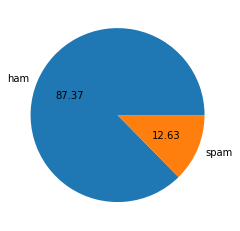

In [202]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [203]:
# Data is imbalence 

In [204]:
import nltk

In [205]:
df['num_chars'] = df['text'].apply(len)

In [206]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [207]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [208]:
# num of words 
import nltk
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [209]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [210]:
df['num_sentences']  = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [211]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [212]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286903,1.961308
std,58.236293,13.227173,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [213]:
# ham
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [214]:
# spam
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [215]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\hp\anaconda3\lib\site-packages (0.12.1)


In [216]:
import seaborn as sns

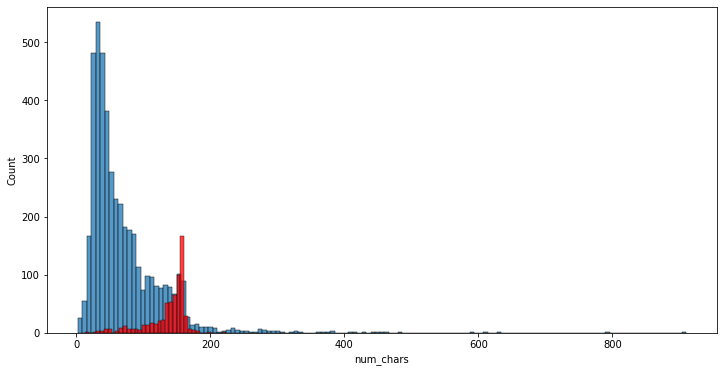

In [217]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'], color='red')

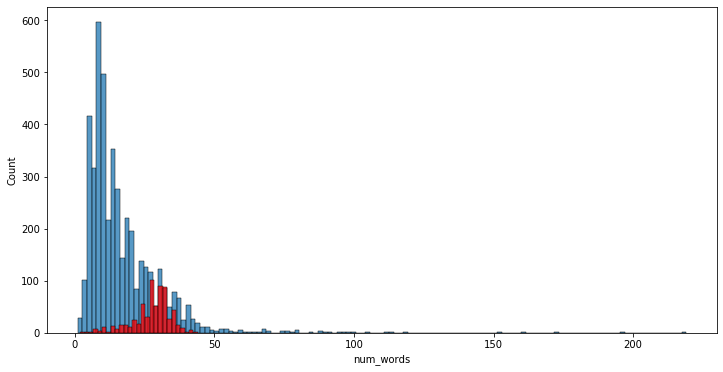

In [218]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

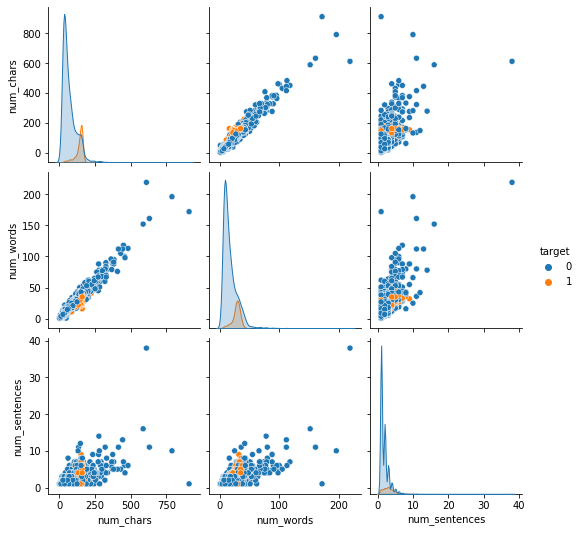

In [219]:
# relation between the column
sns.pairplot(df, hue='target')

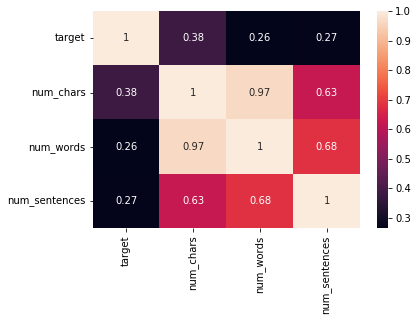

In [220]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
# undertand the words
# test pre processing 

# Data processing 
# 1. Lower case 
# 2. Tokenization 
# 3. Removing special characters
# 4. Removing stop words and punctuations
# 5. stemming 

In [ ]:
import nltk
nltk.download()

In [221]:
import string
from nltk.corpus import stopwords

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text =  y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [ ]:
# import string
# string.punctuation
!pip install nltk.download('stopwords')

In [222]:
from nltk.corpus import stopwords

In [238]:
# stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("doing")



'do'

In [224]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [226]:
df['transformed_text'] = df['text'].apply(transform_text)

In [227]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [228]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [229]:
!pip install wordcloud

In [230]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

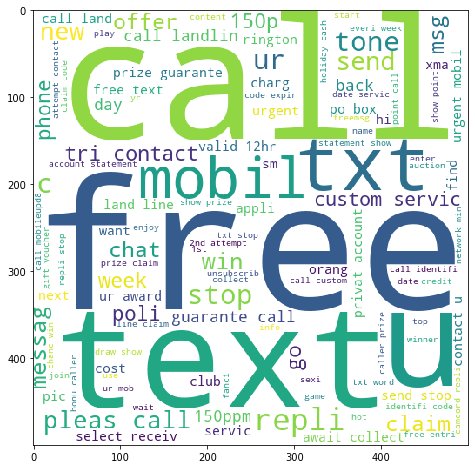

In [231]:
plt.figure(figsize=(16,8))
plt.imshow(spam_wc)

In [232]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

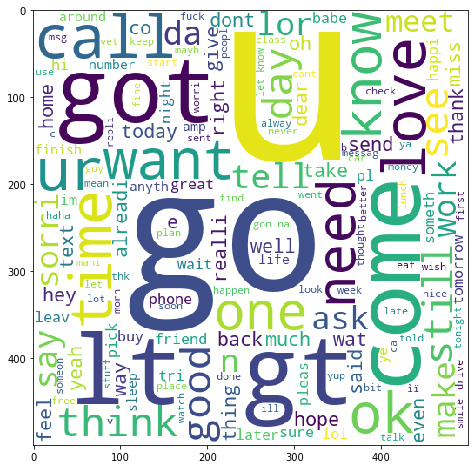

In [233]:
plt.figure(figsize=(16,8))
plt.imshow(spam_wc)

In [234]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [235]:
len(spam_corpus)

9883

In [237]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

# 4. Model Building

# Naive Based algorithm  - gives best performance on textual data


In [301]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

tfidf = TfidfVectorizer(max_features=3000)

In [280]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [281]:
X.shape

(5169, 3000)

In [282]:
y  = df['target'].values

In [283]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [284]:
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [286]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [287]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [288]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


In [289]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [290]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [ ]:
# tfidf --> MNB

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [292]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)

knc = KNeighborsClassifier()

mnb = MultinomialNB()

dtc = DecisionTreeClassifier(max_depth=5)

lrc = LogisticRegression(solver='liblinear', penalty='l1')

rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)

bc = BaggingClassifier(n_estimators=50, random_state=2) 

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)



In [293]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB':mnb,
    'DT': dtc,
    'LR': lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt
}

In [294]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [295]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9748549323017408, 0.9666666666666667)

In [ ]:
print(clfs)

In [296]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9729206963249516
Precision -  1.0
For DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For Bgc
Accuracy -  0.9545454545454546
Precision -  0.8582677165354331
For ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293


In [298]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [299]:
performance_df

,Algorithm,Accuracy,Precision
1,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.905222,1.000000
2,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.972921,1.000000
8,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.977756,0.983193
5,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.971954,0.973913
0,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.974855,0.966667
4,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.957447,0.951923
6,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.964217,0.931624
9,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.948743,0.929293
7,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.954545,0.858268
3,"(SVC, KN, NB, DT, LR, RF, AdaBoost, Bgc, ETC, ...",0.932302,0.833333


In [300]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))